In [1]:
# Import all scikit-learn modules
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import IsolationForest
from sklearn.multioutput import MultiOutputClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
# Section 1: Introduction
print("=== Scikit-Learn NLP Demo with All Functionalities ===")
print("This program uses the 20 Newsgroups dataset to showcase all scikit-learn features.\n")

=== Scikit-Learn NLP Demo with All Functionalities ===
This program uses the 20 Newsgroups dataset to showcase all scikit-learn features.



In [3]:
# Section 2: Loading Data
# Here I load a subset of the 20 Newsgroups dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups = datasets.fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target
print("Dataset size:", len(X))
print("Target names:", newsgroups.target_names, "\n")

Dataset size: 3759
Target names: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'] 



In [8]:
# Section 3: Simulate Additional Features
# Here I simulate a numerical feature (e.g., document length) and a second target (e.g., sentiment)
doc_lengths = [len(doc.split()) for doc in X]
y_sentiment = np.random.randint(0, 2, size=len(y))  # Fake binary sentiment
X_num = np.array(doc_lengths, dtype=float).reshape(-1, 1)  # Use float to allow NaN

In [9]:
# Section 4: Imputation (Simulated Missing Values)
print("=== Imputation with SimpleImputer ===")
# Here I introduce missing values to the numerical feature
X_num_with_missing = X_num.copy()
X_num_with_missing[np.random.choice(len(X), 10)] = np.nan
imputer = SimpleImputer(strategy='mean')
X_num_imputed = imputer.fit_transform(X_num_with_missing)
print("Imputed doc lengths sample:", X_num_imputed[:5].flatten(), "\n")

=== Imputation with SimpleImputer ===
Imputed doc lengths sample: [115.  96.   0.  55. 199.] 



In [10]:
# Section 5: Splitting Data
# Here I split both text and numerical data
X_train, X_test, y_train, y_test, y_sent_train, y_sent_test, X_num_train, X_num_test = train_test_split(
    X, y, y_sentiment, X_num_imputed, test_size=0.3, random_state=42
)

In [11]:
# Section 6: Text Preprocessing and Vectorization
print("=== Text Preprocessing with TfidfVectorizer ===")
# Here I vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF shape:", X_train_tfidf.shape, "\n")

=== Text Preprocessing with TfidfVectorizer ===
TF-IDF shape: (2631, 5000) 



In [12]:
# Section 7: Numerical Preprocessing
print("=== Numerical Preprocessing ===")
# Here I scale the numerical feature
scaler = StandardScaler()
X_num_train_scaled = scaler.fit_transform(X_num_train)
X_num_test_scaled = scaler.transform(X_num_test)

=== Numerical Preprocessing ===


In [13]:
# Here I add polynomial features to the numerical data
poly = PolynomialFeatures(degree=2, include_bias=False)
X_num_train_poly = poly.fit_transform(X_num_train_scaled)
X_num_test_poly = poly.transform(X_num_test_scaled)
print("Polynomial numerical shape:", X_num_train_poly.shape, "\n")

Polynomial numerical shape: (2631, 2) 



In [14]:
# Section 8: Combine Features
# Here I combine TF-IDF and numerical features (after SVD for efficiency)
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)
X_train_combined = np.hstack((X_train_svd, X_num_train_poly))
X_test_combined = np.hstack((X_test_svd, X_num_test_poly))
print("Combined features shape:", X_train_combined.shape, "\n")

Combined features shape: (2631, 52) 



In [15]:
# Section 9: Feature Selection
print("=== Feature Selection with SelectKBest ===")
# Here I select top features (limited to TF-IDF due to chi2 requirement)
selector = SelectKBest(chi2, k=1000)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

=== Feature Selection with SelectKBest ===


=== TSNE Visualization ===


C:\Users\ASUS\miniconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ASUS\miniconda3\envs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\ASUS\miniconda3\envs\myenv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\ASUS\miniconda3\envs\myenv\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ASUS\miniconda3\envs\myenv\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executabl

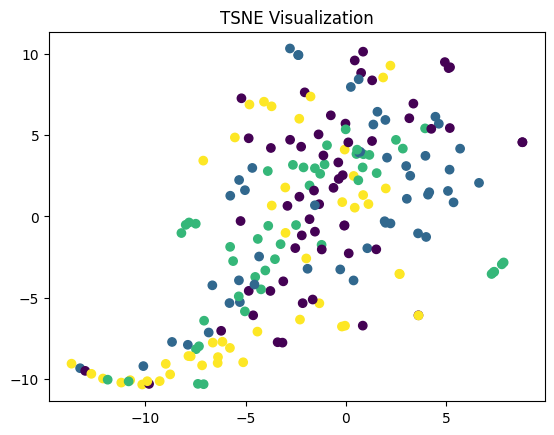

In [16]:
# Section 10: TSNE Visualization
print("=== TSNE Visualization ===")
# Here I visualize a subset with TSNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_combined[:200])
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[:200], cmap='viridis')
plt.title("TSNE Visualization")
plt.show()

In [17]:
# Section 11: Supervised Models
# Here I train models on combined features
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_combined, y_train)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_combined, y_train)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_combined, y_train)
mlp = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000, random_state=42)
mlp.fit(X_train_combined, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=1000, random_state=42)

In [18]:
print("LR Accuracy:", accuracy_score(y_test, lr.predict(X_test_combined)))
print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test_combined)))
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_combined)))
print("MLP Accuracy:", accuracy_score(y_test, mlp.predict(X_test_combined)), "\n")

LR Accuracy: 0.8262411347517731
RF Accuracy: 0.8129432624113475
SVM Accuracy: 0.3554964539007092
MLP Accuracy: 0.8218085106382979 



In [19]:
# Section 12: Ensemble Methods
# Here I create a VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('svm', svm)], voting='soft')
voting_clf.fit(X_train_combined, y_train)
print("Voting Accuracy:", accuracy_score(y_test, voting_clf.predict(X_test_combined)))

Voting Accuracy: 0.8226950354609929


In [20]:
# Here I apply BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bagging.fit(X_train_combined, y_train)
print("Bagging Accuracy:", accuracy_score(y_test, bagging.predict(X_test_combined)), "\n")

Bagging Accuracy: 0.824468085106383 



In [21]:
# Section 13: Clustering
print("=== Clustering with KMeans ===")
# Here I cluster the combined features
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_combined)
print("Cluster sample:", kmeans.labels_[:5], "\n")

=== Clustering with KMeans ===
Cluster sample: [0 0 0 0 0] 



C:\Users\ASUS\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


In [22]:
# Section 14: Outlier Detection
print("=== Outlier Detection with IsolationForest ===")
# Here I detect outliers
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(X_train_combined)
print("Outlier sample:", outliers[:5], "\n")

=== Outlier Detection with IsolationForest ===
Outlier sample: [ 1  1  1  1 -1] 



In [23]:
# Section 15: Gaussian Process Regression (Simulated)
print("=== Gaussian Process Regression ===")
# Here I predict document length as a regression task
gpr = GaussianProcessRegressor(random_state=42)
gpr.fit(X_train_svd, X_num_train_scaled.flatten())
print("GPR R^2:", gpr.score(X_test_svd, X_num_test_scaled.flatten()), "\n")

=== Gaussian Process Regression ===
GPR R^2: -0.07315130459809627 



In [24]:
# Section 16: Model Calibration
print("=== Model Calibration ===")
# Here I calibrate the SVM
calibrated_svm = CalibratedClassifierCV(svm, cv=5, method='sigmoid')
calibrated_svm.fit(X_train_combined, y_train)
print("Calibrated SVM Accuracy:", accuracy_score(y_test, calibrated_svm.predict(X_test_combined)), "\n")

=== Model Calibration ===
Calibrated SVM Accuracy: 0.4858156028368794 



In [25]:
# Section 17: Multi-output Classification
print("=== Multi-output Classification ===")
# Here I train on both category and sentiment
y_multi_train = np.column_stack((y_train, y_sent_train))
y_multi_test = np.column_stack((y_test, y_sent_test))
multi_clf = MultiOutputClassifier(rf, n_jobs=-1)
multi_clf.fit(X_train_combined, y_multi_train)
multi_pred = multi_clf.predict(X_test_combined)
print("Multi-output Accuracy (category):", accuracy_score(y_multi_test[:, 0], multi_pred[:, 0]), "\n")

=== Multi-output Classification ===
Multi-output Accuracy (category): 0.8129432624113475 



In [26]:
# Section 18: Custom Estimator
print("=== Custom Estimator ===")
# Here I define a custom classifier
class SimpleTextClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self): self.centroids_ = None
    def fit(self, X, y): self.centroids_ = [np.mean(X[y == i], axis=0) for i in range(4)]; return self
    def predict(self, X): return np.array([np.argmin([np.linalg.norm(x - c) for c in self.centroids_]) for x in X])
custom_clf = SimpleTextClassifier()
custom_clf.fit(X_train_combined, y_train)
print("Custom Accuracy:", accuracy_score(y_test, custom_clf.predict(X_test_combined)), "\n")

=== Custom Estimator ===
Custom Accuracy: 0.23138297872340424 



In [27]:
# Section 19: Time Series Split (Simulated)
print("=== Time Series Split (Simulated) ===")
# Here I simulate time-ordered data
tscv = TimeSeriesSplit(n_splits=3)
for train_idx, test_idx in tscv.split(X_train_combined):
    X_tr, X_te = X_train_combined[train_idx], X_train_combined[test_idx]
    y_tr, y_te = y_train[train_idx], y_train[test_idx]
    rf.fit(X_tr, y_tr)
    print("TimeSeriesSplit fold accuracy:", accuracy_score(y_te, rf.predict(X_te)))
print("\n")

=== Time Series Split (Simulated) ===
TimeSeriesSplit fold accuracy: 0.7747336377473364
TimeSeriesSplit fold accuracy: 0.802130898021309
TimeSeriesSplit fold accuracy: 0.8188736681887366




In [28]:
# Section 20: Cross-Validation and Tuning
# Here I perform cross-validation
cv_scores = cross_val_score(lr, X_train_combined, y_train, cv=5)
print("LR CV Mean:", cv_scores.mean())
# Here I tune SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train_combined, y_train)
print("Best SVM params:", grid_search.best_params_, "\n")

LR CV Mean: 0.8209832540890758
Best SVM params: {'C': 10, 'kernel': 'linear'} 



Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.77      0.65      0.70       252
soc.religion.christian       0.86      0.91      0.89       295
         comp.graphics       0.83      0.85      0.84       299
               sci.med       0.79      0.83      0.81       282

              accuracy                           0.82      1128
             macro avg       0.81      0.81      0.81      1128
          weighted avg       0.81      0.82      0.81      1128



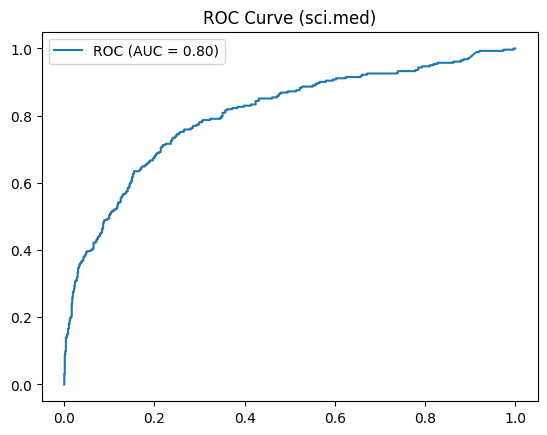

In [29]:
# Section 21: Evaluation Metrics
# Here I evaluate Random Forest
rf_pred = rf.predict(X_test_combined)
print("Classification Report:\n", classification_report(y_test, rf_pred, target_names=categories))
y_prob = svm.predict_proba(X_test_combined)[:, 3]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=3)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc(fpr, tpr):.2f})')
plt.title('ROC Curve (sci.med)')
plt.legend()
plt.show()

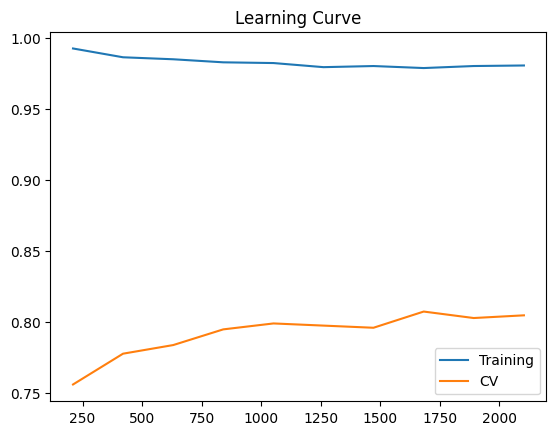

In [30]:
# Section 22: Learning and Validation Curves
# Here I plot learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train_combined, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training')
plt.plot(train_sizes, test_scores.mean(axis=1), label='CV')
plt.title('Learning Curve')
plt.legend()
plt.show()

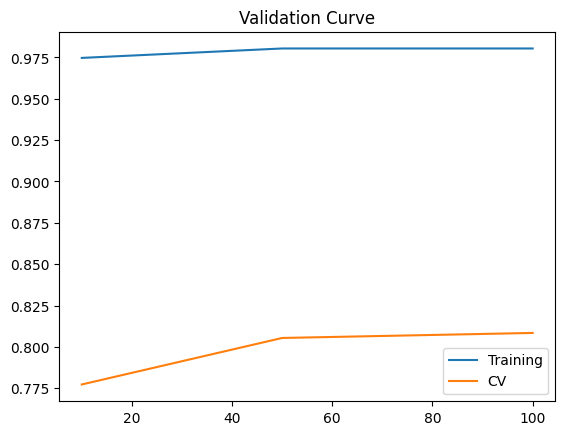

In [31]:
# Here I plot validation curve
param_range = [10, 50, 100]
train_scores, test_scores = validation_curve(rf, X_train_combined, y_train, param_name="n_estimators", param_range=param_range, cv=5)
plt.figure()
plt.plot(param_range, train_scores.mean(axis=1), label='Training')
plt.plot(param_range, test_scores.mean(axis=1), label='CV')
plt.title('Validation Curve')
plt.legend()
plt.show()

=== Partial Dependence Plots ===


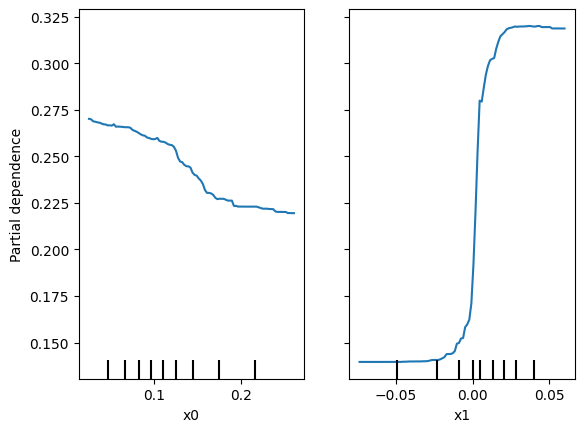

In [33]:
# Section 23: Partial Dependence (on SVD features)
print("=== Partial Dependence Plots ===")
# Here I plot partial dependence for first two SVD components, specifying target class 1
fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(rf, X_train_combined, features=[0, 1], target=1, ax=ax)
plt.show()

In [34]:
# Section 24: Model Persistence
print("=== Model Persistence ===")
# Here I save and load the pipeline
joblib.dump(rf, 'rf_nlp_model.pkl')
loaded_rf = joblib.load('rf_nlp_model.pkl')
print("Loaded RF Accuracy:", accuracy_score(y_test, loaded_rf.predict(X_test_combined)), "\n")

=== Model Persistence ===
Loaded RF Accuracy: 0.8164893617021277 



In [35]:
# Section 25: Pipeline
print("=== Pipeline ===")
# Here I create a full pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('svd', TruncatedSVD(n_components=50)),
    ('clf', RandomForestClassifier(random_state=42))
])
pipeline.fit(X_train, y_train)
print("Pipeline Accuracy:", accuracy_score(y_test, pipeline.predict(X_test)), "\n")

=== Pipeline ===
Pipeline Accuracy: 0.8200354609929078 



In [36]:
# Section 26: Prediction
# Here I predict a new text sample
new_text = ["God bless the graphics community!"]
print("New text:", new_text)
print("Predicted category:", categories[pipeline.predict(new_text)[0]])

New text: ['God bless the graphics community!']
Predicted category: sci.med
